## Customer Classification for Bank Direct Marketing

#### Author : Nurgul Kurbanali kyzy

### 1. Overview

As It is a marketing problem a lot of resources are included and it is very important to optimise results to save resources. The target variable is ‘deposit’ which reads yes or no based on success or failure of phone calls. Finding out only those clients which have higher chances of saying yes to subscription of term deposit , will save a lot of manhours and efforts. Predicting as many positives as possible out of actual positives from dataset is the goal here, thus recall has been chosen as one of the performance matrices along with an accuracy score.
As our data are imbalanced, we used oversampling method during the model building process. After preprocessing the data, we build nine model including baseline model. The optimal model we get is Random Forest Classifier.

### 2. Business Understanding

A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

The older marketing options have contributed minimal in increasing the business of banks. Due to internal competition and financial crisis European Banks were under pressure to increase their financial assets. They offered long term deposits with good interest rates to the people using direct marketing strategy but contacting many people takes lot of time and success rate is also less. So they want to take help of the technology to come up with a solution that increases the efficiency by making fewer calls but improves the success rate.Portuguese Banking Institution has provided the data related to marketing campaigns that took over phone calls. Finding out the characteristics that are helping Bank to make customers successfully subscribe for deposits, which helps in increasing campaign efficiently and selecting high value customers.

The goal of this project is to building Machine Learning model that learns the unknown patterns and classifying whether client will subscribe(yes/no) a term deposit (variable y).

### 3. Data Understanding

Data set is taken from [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). This data based on direct marketing campaigns of a Portuguese banking
institution. The marketing campaigns are based on phone calls and related to 17 campaigns, which occurred from May 2008 to November 2010. Often, more than one contact to the same client was required, in order to access if the product (bank term
deposit) would be (or not) subscribed.

#### 3.1 Loading Data Modelling Libraries

In [114]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import csv
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.3f}'.format
# Data visualization
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn's beautiful styling
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Model building sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score,f1_score, auc,
confusion_matrix, classification_report, precision_recall_curve)
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder
from collections import Counter 
from imblearn.over_sampling import SMOTENC
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")

In [115]:
# Downloading dataset
df = pd.read_csv('dataset/bank-full.csv', delimiter=';', quotechar='"',
                 encoding='utf8', quoting=csv.QUOTE_ALL, skipinitialspace=True)

In [116]:
# Displaying first 5 rows 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [117]:
#  Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [118]:
# 5 summary statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000
mean,40.936,1362.272,15.806,258.163,2.764,40.198,0.580
std,10.619,3044.766,8.322,257.528,3.098,100.129,2.303
min,18.000,-8019.000,1.000,0.000,1.000,-1.000,0.000
25%,33.000,72.000,8.000,103.000,1.000,-1.000,0.000
50%,39.000,448.000,16.000,180.000,2.000,-1.000,0.000
75%,48.000,1428.000,21.000,319.000,3.000,-1.000,0.000
max,95.000,102127.000,31.000,4918.000,63.000,871.000,275.000


#### 3.2.   Data Preprocessing

##### Handling Missing Values 

In [119]:
# Checking for Null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

##### Checking for Outliers

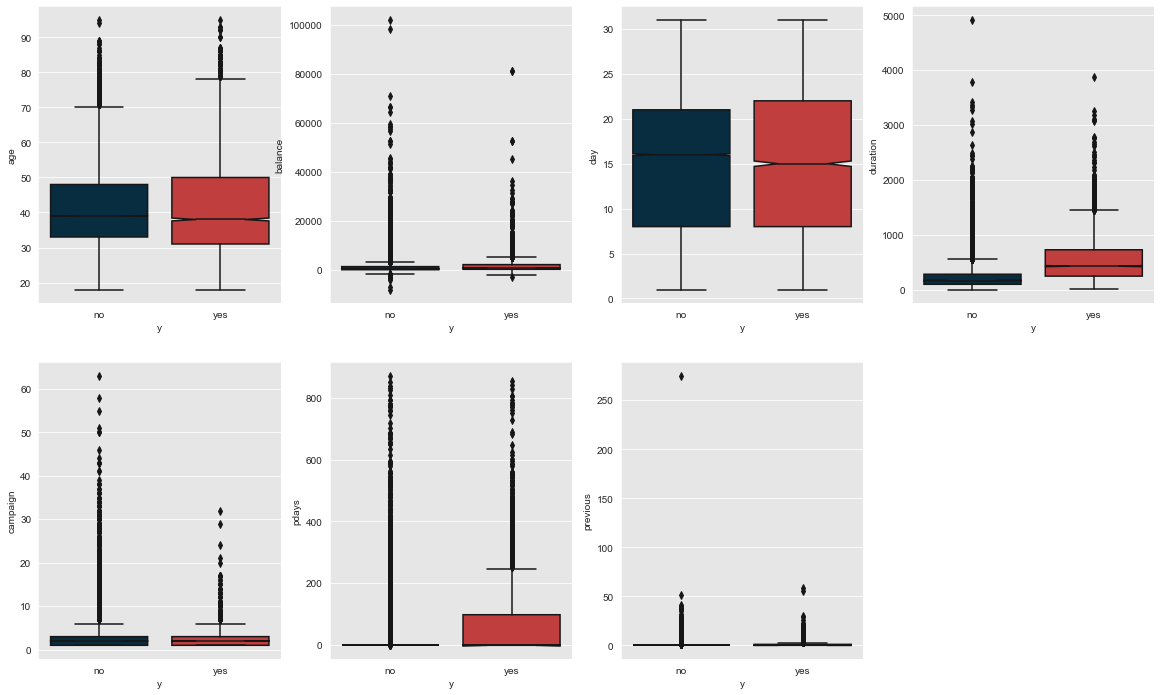

In [120]:
# Plotting outliers
fig, axes = plt.subplots(nrows = 2, ncols = 4)    # axes is 2d array (2x4)
axes = axes.flatten()        
fig.set_size_inches(20, 12)
colors =['#003049','#D62828']
num_col = df.select_dtypes('int64')
for ax, col in zip(axes, num_col.columns):
    sns.boxplot(x='y', y=df[col],ax = ax,  notch= True, data=df, palette=colors)
    axes.flat[-1].set_visible(False) # to remove last plot


From the above boxplot we can say  that for both the customers that subscibed or didn’t subscribe a term deposit, has a median age of around 36/40. 

Outlier removal means deleting extreme values from  dataset before  perform analyses. We aim to delete any dirty data while retaining true extreme values.<p>
It’s a tricky procedure because it’s often impossible to tell the two types apart for sure. Deleting true outliers may lead to a biased dataset and an inaccurate conclusion.<p>
    We will just drop some outliers exceeding the upper fence in <mark>duration</mark>  <mark>previous</mark> columns

In [121]:
# Dropping extreme values
df.drop(df[df['duration'] > 4500].index, inplace = True)
df.drop(df[df['previous'] > 250].index, inplace = True)

In [122]:
# Checking lenth of DataFrame
df.shape

(45209, 17)

#####  Data Distribution

<AxesSubplot:title={'center':'Frequency distribution of the target variables'}>

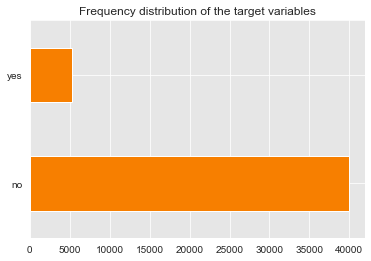

In [123]:
# Checking for class balance
df['y'].value_counts().plot(kind='barh', title="Frequency distribution of the target variables", color='#F77F00')

This is an imbalanced classification means that there are too few examples of the minority class for a model to effectively learn the decision boundary. 

In [124]:
# Renaming target column
df.rename(columns={"y": "target"}, inplace=True)

In [125]:
# Checking for unique values
df.target.unique()

array(['no', 'yes'], dtype=object)

In [126]:
# Changing values from str to numeric val
df['target'] = df['target'].map({'yes': 1, 'no': 0})

In [127]:
# Displaying non-object data type columns
df.dtypes[df.dtypes == 'object']

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
dtype: object

In [128]:
# Renaming some columns
df.rename(columns = {'default':'has_credit', 'housing':'has_housing_loan',
                     'loan':'has_personal_loan', 'poutcome':'prev_camp_outc'}, inplace = True)

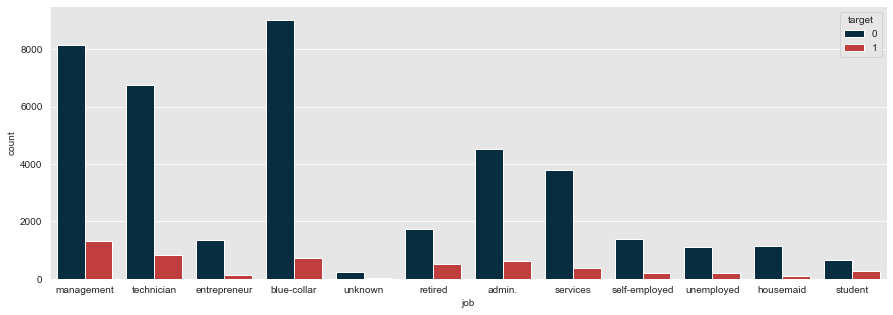

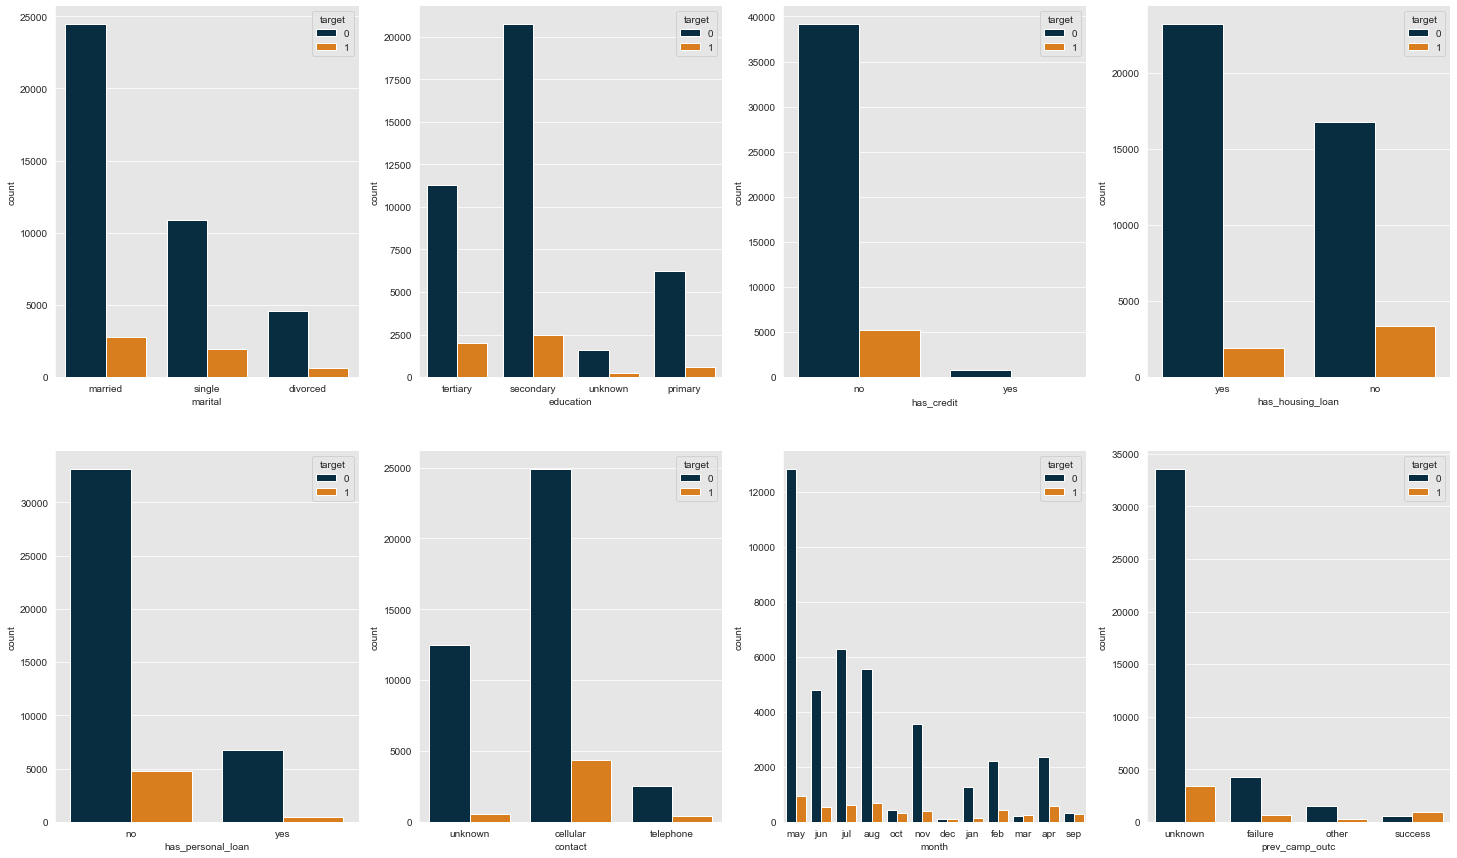

In [129]:
# Plotting distribution of categorical values
'''
Since 'job' column contains more value types  I will plot it seperately
'''
plt.figure(figsize=[15,5])
sns.countplot( x='job', data=df, hue='target', palette=colors)
sns.despine()

fig, axes = plt.subplots(nrows = 2, ncols = 4)   
axes = axes.flatten()        
fig.set_size_inches(25, 15)
colors =['#003049','#F77F00']
# Selecting categorical values
cat_col = df[['marital','education','has_credit',
              'has_housing_loan','has_personal_loan',
              'contact','month','prev_camp_outc',]]
for ax, col in zip(axes, cat_col.columns):
    sns.countplot( x=df[col],ax = ax,  data=df, hue='target', palette=colors)
    sns.despine()


- According to the above plot, we can see that the customers who work in management positions have the highest rate of subscribing to a term deposit, but they are also the higher after the blue-collar professions when it comes to not subscribing
- Customers who have a personal loans are more inclined to subscribe to a term deposit.
- Mostly married  and single marital people made subscriptions compare to the people who are divorced.
- Most people after receiving their secondary or tertiary  educations can afford term deposits.
- Majority subscribed customers were contacted via cellular phones.

The *unknown* variables will be removed due to do not represent an impact over the dataset 

In [130]:
# Dropping 'unknown' row values 
df = df[df.job != 'unknown']
df = df[df.education != 'unknown']
df=  df[df.contact !='unknown']

In [131]:
# Counting unique values within the 'pdays' clumn
'''
number of days that passed by after the client was last contacted from 
a previous campaign (numeric, -1 means client was not previously contacted)
'''
df.pdays.value_counts()

-1      23059
 182      151
 92       138
 183      120
 91       115
        ...  
 774        1
 550        1
 486        1
 470        1
 32         1
Name: pdays, Length: 530, dtype: int64

In [132]:
# Replacing negative value to 0
df['pdays'] = df['pdays'].replace({-1: 0})

In [133]:
# Getting copy of the original DataFrame fo future Synthetic Resampling
df_copy = df.copy()

In [134]:
df_copy.head()

,age,job,marital,education,has_credit,balance,has_housing_loan,has_personal_loan,contact,day,month,duration,campaign,pdays,previous,prev_camp_outc,target
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,0,0,unknown,0
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,0,0,unknown,0
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,0,0,unknown,0
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,0,0,unknown,0
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,0,0,unknown,0


In [135]:
# Changing categorical values from str into int 
df['has_credit']= df['has_credit'].map({'yes': 1, 'no' : 0})
df['has_housing_loan']= df['has_housing_loan'].map({'yes': 1, 'no' : 0})
df['has_personal_loan']= df['has_personal_loan'].map({'yes': 1, 'no' : 0})


In [136]:
# Building correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

,age,has_credit,balance,has_housing_loan,has_personal_loan,day,duration,campaign,pdays,previous,target
age,1.000000,-0.009217,0.099586,-0.170506,-0.010080,0.013408,0.007284,0.007998,-0.034087,-0.002396,0.031161
has_credit,-0.009217,1.000000,-0.060991,-0.010241,0.083693,0.021191,-0.010487,0.026288,-0.031144,-0.021915,-0.029111
balance,0.099586,-0.060991,1.000000,-0.055906,-0.089250,-0.002580,0.020112,-0.021608,-0.004943,0.016416,0.054905
has_housing_loan,-0.170506,-0.010241,-0.055906,1.000000,0.044992,-0.065008,-0.005408,-0.056585,0.220058,0.097612,-0.133455
has_personal_loan,-0.010080,0.083693,-0.089250,0.044992,1.000000,0.008700,-0.016453,0.021411,-0.032607,-0.017559,-0.084206
day,0.013408,0.021191,-0.002580,-0.065008,0.008700,1.000000,-0.038947,0.215524,-0.126226,-0.077114,-0.046304
duration,0.007284,-0.010487,0.020112,-0.005408,-0.016453,-0.038947,1.000000,-0.092979,-0.000398,-0.000913,0.397735
campaign,0.007998,0.026288,-0.021608,-0.056585,0.021411,0.215524,-0.092979,1.000000,-0.108776,-0.045538,-0.090407
pdays,-0.034087,-0.031144,-0.004943,0.220058,-0.032607,-0.126226,-0.000398,-0.108776,1.000000,0.520895,0.071381
previous,-0.002396,-0.021915,0.016416,0.097612,-0.017559,-0.077114,-0.000913,-0.045538,0.520895,1.000000,0.094019


The most correlated feature to the target is last contact <mark>duration</mark> of the customers. Next comes the number of days that passed by after the client was last contacted from a previous campaign  and  number of contacts performed before this campaign  showing a correlatio to the target value. Thus this two are  highly multicollinear among each other. Having a housing loan also correlated to the number of days that passed by after the client was last contacted from a previous campaign.

In [137]:
# Changing values
df = df.replace({'prev_camp_outc': {'other':'unknown'}})

### 4.  Model Building

##### Performing Train-Test Split

We will further split the data into train test sets whcih  allows us to simulate how a model would perform on new/unseen data. The training and validation data set is split into an *80:20* ratio. 

In [138]:
# Target&Feature setting
y = df['target']
X = df.drop(columns='target')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
print (X_train.shape,y_train.shape)
print (X_test.shape,y_test.shape)


(24724, 16) (24724,)
(6181, 16) (6181,)


In [26]:
X_test

,age,job,marital,education,has_credit,balance,has_housing_loan,has_personal_loan,contact,day,month,duration,campaign,pdays,previous,prev_camp_outc
22770,41,management,married,tertiary,0,51,0,0,cellular,25,aug,140,8,0,0,unknown
17905,42,technician,single,secondary,0,746,0,0,cellular,30,jul,86,2,0,0,unknown
35609,45,technician,divorced,secondary,0,3271,0,0,cellular,7,may,388,2,0,0,unknown
40783,45,management,married,tertiary,0,3857,1,0,cellular,11,aug,425,2,190,1,failure
13944,25,blue-collar,single,primary,0,2483,0,0,cellular,10,jul,1499,3,0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,38,management,married,tertiary,0,7255,1,0,cellular,20,apr,410,2,0,0,unknown
23319,36,management,married,tertiary,0,0,0,0,cellular,27,aug,558,11,0,0,unknown
41020,45,management,single,tertiary,0,2067,1,0,cellular,13,aug,393,2,462,1,success
43476,35,self-employed,married,tertiary,0,1178,1,1,cellular,15,apr,220,2,183,5,failure


In [73]:
df.dtypes[df.dtypes == 'object']

job               object
marital           object
education         object
contact           object
month             object
prev_camp_outc    object
dtype: object

In [112]:
df.dtypes[df.dtypes != 'object']

age                  int64
has_credit           int64
balance              int64
has_housing_loan     int64
has_personal_loan    int64
day                  int64
duration             int64
campaign             int64
pdays                int64
previous             int64
target               int64
dtype: object

In [139]:
from sklearn.compose import ColumnTransformer

numeric_feat = ['age', 'has_credit','balance','has_housing_loan',
                    'has_personal_loan','day','duration','campaign',
                    'pdays','previous']
categorical_feat = ['job','marital','education','contact','month','prev_camp_outc']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_feat),
        ("cat", categorical_transformer, categorical_feat),
    ]
)


In [109]:
columns_to_encode = ['job','marital','education','contact','month','prev_camp_outc']

In [110]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train = ohe.fit_transform(X_train[columns_to_encode])
X_test = ohe.transform(X_test[columns_to_encode])

In [111]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

##### Model-1. Baseline Model (Dummy Classifier ) / Pipeline

We normalize after splitting our data into training and test sets. This is to avoid information "leaking" from our test set into our training set . Normalization (also sometimes called Standardization or Scaling) means making sure that all of the data are represented at the same scale. The most common way to do this is to convert all numerical values to z-scores.

To be able to truly understand and then improve our model’s performance,  first we need to establish a baseline  called a *Dummy Classifier* for the data that we have. A dummy classifier is exactly what it sounds like! It is a classifier model that makes predictions without trying to find patterns in the data. 

**Insights of a Confusion Matrix:**<p>
The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential clients that are likely to suscribe to a term deposit.
- Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.

True Positives (Bottom-Right Square): This is the percentage of **correctly** classifications of the "Yes" class or potenial clients that are willing to subscribe term deposit.
    
False Positive (Bottom-Left Square), means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did. It is not good because we think that we already have that client but we dont and maybe we lost him in other future campaings.

True Negatives (Top-Left Square): This is the percentage of **correctly** classifications of the "No" class or potenial clients that are not willing to suscribe a term deposit
    
False Negative (Top-Right Square), means the client SUBSCRIBED to term deposit, but the model said he dont. In this case its ok, we have that client and in the future we'll discovery that in truth he's already our client.

So, our objective here, is to find the best model by confusion matrix with the lowest False Positive(FP)  and highest True Positive(TP) as possible. In addition we primarily care about correctly identifying subscribed  clients to a  term deposit, so the recall score becomes more important. 

In [140]:
# Instantiating the Dummy Classifier and creating pipeline
#scaler = StandardScaler()
dummy_clf = DummyClassifier(random_state=2, strategy='stratified')

dummy_pipe = Pipeline(steps=[('prep', preprocessor), 
                            ('model',dummy_clf)])
# fitting the  Baseline model
dummy_pipe.fit(X_train, y_train)
                             
print(f'Training Score:', dummy_pipe.score(X_train, y_train))
print(f'Testing Score', dummy_pipe.score(X_test, y_test))

Training Score: 0.7533570619640835
Testing Score 0.752790810548455


In [141]:
# Defining function for Model Evaluation
def model_evaluation(model_pipe, X_train, y_train, X_test, y_test, name):
    
    y_pred_train = model_pipe.predict(X_train)
    y_pred_test = model_pipe.predict(X_test)
# define evaluation procedure
    rec_score = recall_score(y_test, y_pred_test)*100
    
# Classification report 
    print('------------------------------------')
    print('Classification Report for Training:')
    print(classification_report(y_train, y_pred_train))
    print('------------------------------------')
    print('Classification Report for Testing:')
    print(classification_report(y_test, y_pred_test))
    print(f'Testing Recall Score of {name} : {round(rec_score,2)}%')
    
# Confusion matrix
    print('------------------------------------')
    print (f'Confusion Matrix for {name}')
    plot_confusion_matrix(model_pipe, 
    X_test, 
    y_test, 
    normalize='true',
    cmap='Blues_r',
    display_labels= ['Not Subscribed', 'Subscribed'],
    values_format='.0%')
    title= 'Confusion Matrix'
    plt.grid(False) #removes grid lines from plot
    
    
# Plotting precision and recall curve
    y_score = model_pipe.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    fig, ax = plt.subplots()
    no_skill = len(y_test[y_test==1]) / len(y_test)
    ax.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    ax.plot(recall, precision, marker='.', label=name)
    #add axis labels to plot
    ax.set_title(f'{name} Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')
    ax.legend()
    #display plot
    plt.show()
    print ("Area Under PR Curve(AP): %0.2f" % average_precision_score(y_test, y_score))
    print('------------------------------------')

------------------------------------
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     21124
           1       0.15      0.15      0.15      3600

    accuracy                           0.75     24724
   macro avg       0.50      0.50      0.50     24724
weighted avg       0.75      0.75      0.75     24724

------------------------------------
Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5268
           1       0.15      0.15      0.15       913

    accuracy                           0.75      6181
   macro avg       0.50      0.50      0.50      6181
weighted avg       0.75      0.75      0.75      6181

Testing Recall Score of Dummy Classifier : 14.9%
------------------------------------
Confusion Matrix for Dummy Classifier


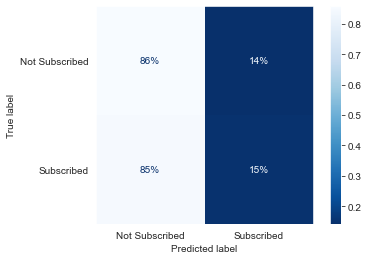

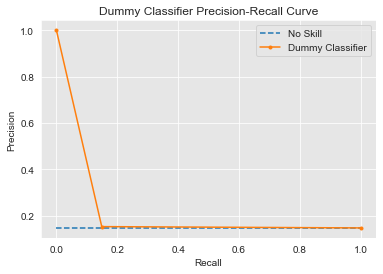

Area Under PR Curve(AP): 0.15
------------------------------------


In [30]:
model_evaluation(dummy_pipe, X_train, y_train, X_test,y_test, 'Dummy Classifier')

 Lets display the proportion of our target classes

The baseline model evaluated 86% of  False Negative (FN) values and 85% of  True Negative (TN). Model could be effected by class imbalance. With this in mind, we confirm  the imbalance problem related above. So, we will set class_weight parameter into *'balanced'* to solve this issue. This adjusts so total weights are equal accross classes; in other words, members of the majority (not-subscribed) class will be given less weight than members of the minority (subscribed) class. 

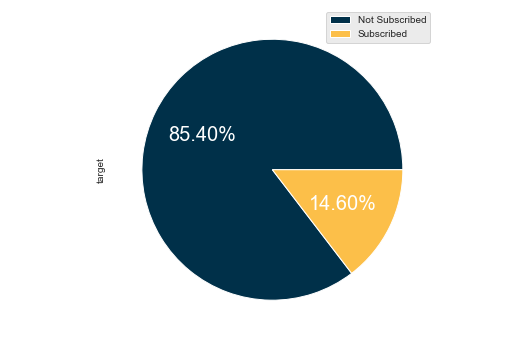

In [142]:
# Plotting class distribution in terms of the %
labels = ["Not Subscribed", "Subscribed"]
plt.figure(figsize = (10,6))
colors =['#003049','#FCBF49']
y.value_counts().plot.pie(labels=labels,autopct='%1.2f%%', colors=colors , textprops={'fontsize': 20,'color':'white'});
plt.legend()
plt.show()

#####  Model-2. Logistic Regression  /  balanced class_weight / Pipeline

In [145]:
# Instantiating the Logistic Regression Model and creating pipeline
logreg_clf= LogisticRegression(
                           random_state=27,
                           solver='liblinear',
                           class_weight='balanced', 
                           max_iter=1e3)

logreg_pipe = Pipeline(steps=[('prep', preprocessor), 
                            ('logreg',logreg_clf),
                              ])
# fitting the logistic regression model
logreg_pipe.fit(X_train, y_train)
print(f'Training Score:',logreg_pipe.score(X_train, y_train))
print(f'Testing Score',logreg_pipe.score(X_test, y_test))


Training Score: 0.8311357385536321
Testing Score 0.8272124251739201


------------------------------------
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.96      0.84      0.89     21124
           1       0.45      0.80      0.58      3600

    accuracy                           0.83     24724
   macro avg       0.71      0.82      0.74     24724
weighted avg       0.89      0.83      0.85     24724

------------------------------------
Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5268
           1       0.45      0.79      0.57       913

    accuracy                           0.83      6181
   macro avg       0.70      0.81      0.73      6181
weighted avg       0.88      0.83      0.84      6181

Testing Recall Score of Logistic Regression : 78.64%
------------------------------------
Confusion Matrix for Logistic Regression


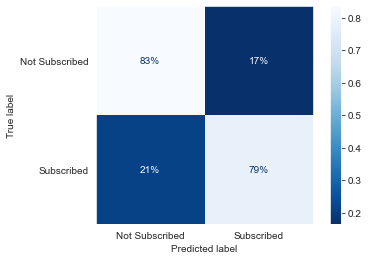

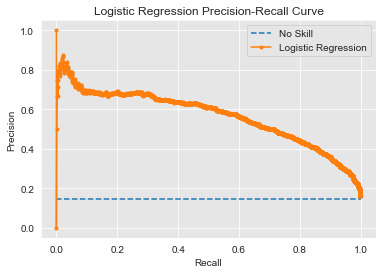

Area Under PR Curve(AP): 0.57
------------------------------------


In [146]:
# Logistic Regression Model evaluations 
model_evaluation(logreg_pipe, X_train, y_train, X_test, y_test, 'Logistic Regression')

Logistic Regression with balanced class_weight parameter increased Recall up to 78.64%. We will try to rebuild LogReg Model by addressing imbalanced datasets through oversampling the minority target class. These examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the *Synthetic Minority Over-sampling Technique for Nominal and Continuous.*, or **SMOTENC** for short.

In [34]:
df.campaign.unique()

array([ 1,  2,  4,  3,  6,  5, 19,  9,  8,  7, 14, 15, 11, 12, 30, 33, 13,
       20, 10, 24, 26, 35, 17, 27, 16, 31, 28, 21, 18, 23, 22, 29, 25, 34,
       36, 39, 43, 32, 38, 50, 44], dtype=int64)

In [35]:
df.head(10).T

,12657,12658,12659,12660,12661,12662,12663,12664,12665,12666
age,27,54,43,31,27,28,50,29,25,38
job,management,blue-collar,blue-collar,technician,technician,blue-collar,blue-collar,blue-collar,blue-collar,blue-collar
marital,single,married,married,single,single,single,married,single,single,married
education,secondary,primary,secondary,secondary,secondary,secondary,secondary,primary,secondary,secondary
has_credit,0,0,0,0,0,0,0,0,0,0
balance,35,466,105,19,126,-127,1329,343,192,43
has_housing_loan,0,0,0,0,1,1,1,0,0,0
has_personal_loan,0,0,1,0,1,0,1,0,0,1
contact,cellular,cellular,cellular,telephone,cellular,cellular,telephone,cellular,telephone,cellular
day,4,4,4,4,4,4,4,4,4,4


In [152]:
df.day.unique()

array([ 4,  7,  8,  9, 10, 11, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 28,
       29, 30, 31,  5,  6, 12, 13, 19, 20, 26, 27,  2,  3,  1],
      dtype=int64)

In [84]:
df.shape

(30905, 17)

In [37]:
#cat_feat_mask = [col for col in X_train if np.isin(X_train[col].unique(), [0, 1]).all()]
#cat_indices = list(X_train.iloc[:,np.r_[1, 3,4,7:39]].columns.values)

In [155]:
#Instantiate SMOTENC algorithm along with an index of the categorical feature columns
smote_nc = SMOTENC(categorical_features=[1,2,3,4,6,7,8,10,15], 
                    random_state=27,  # for reproducibility
                    sampling_strategy='auto') # samples only the minority class
# Fitting SMOTENC
X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)
# Preview class distributions before and after over-sampling
print('Original class distribution: \n')
print(y_train.value_counts())
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_res).value_counts()) 

Original class distribution: 

0    21124
1     3600
Name: target, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    21124
0    21124
Name: target, dtype: int64


##### Model-3. Logistic Regression / SMOTENC / Pipeline

In [157]:
# Fitting the Logistic Regression Model
logreg_sm_clf= LogisticRegression(
                           random_state=27,
                           solver='lbfgs',
                           max_iter=1e3,
                           penalty='l2',
                            )

logreg_sm_pipe = Pipeline(steps=[('prep', preprocessor), 
                            ('logreg_sm',logreg_sm_clf),
                              ])
logreg_sm_pipe.fit(X_train_res, y_train_res)
print(f'Training Accuracy Score:',logreg_sm_pipe.score(X_train_res, y_train_res))
print(f'Testing Accuracy Score',logreg_sm_pipe.score(X_test, y_test))


Training Accuracy Score: 0.8564429085400492
Testing Accuracy Score 0.8323895809739524


------------------------------------
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     21124
           1       0.46      0.74      0.57      3600

    accuracy                           0.84     24724
   macro avg       0.71      0.80      0.74     24724
weighted avg       0.88      0.84      0.85     24724

------------------------------------
Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      5268
           1       0.46      0.73      0.56       913

    accuracy                           0.83      6181
   macro avg       0.70      0.79      0.73      6181
weighted avg       0.87      0.83      0.85      6181

Testing Recall Score of Logistic Regression with SMOTENC : 72.62%
------------------------------------
Confusion Matrix for Logistic Regression with SMOTENC


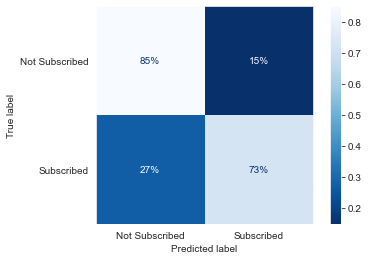

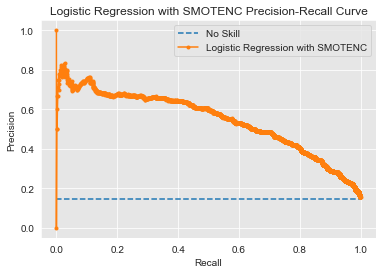

Area Under PR Curve(AP): 0.55
------------------------------------


In [158]:
model_evaluation(logreg_sm_pipe,X_train, y_train, X_test, y_test, 'Logistic Regression with SMOTENC')

Logistic Regression Model with SMOTE did not noticeably increase an accuracy but  on the contrary, it dropped the recall score by 6%.

##### Model-4. Decision Tree Classifier/ balanced class_weight/ Pipeline /  Grid Search

In [43]:
X_train.shape

(24724, 7747)

In [159]:
dt_clf = DecisionTreeClassifier(random_state=27)


# Creating pipeline for Decision Tree Classifier
dt_pipe = Pipeline(steps=[('prep', preprocessor), 
                            ('dt',dt_clf)])
# Defining Hyperparameters                            
dt_params ={
    'dt__class_weight':['balanced'],
     'dt__criterion':['entropy','gini'],
     'dt__splitter':["best", "random"],
     'dt__max_depth': [i for i in range(2,11,2)],
     'dt__min_samples_leaf': [0.1, 0.5, 5] 
}

# Function to create a grid search containing pipeline
def perform_gridsearch(model_pipe, params):
     return GridSearchCV(estimator=model_pipe,
                         param_grid=params,
                        scoring='recall',
                        cv=10,
                        n_jobs=-1)

dt_gs = perform_gridsearch(dt_pipe, dt_params)
 
dt_gs.fit(X_train,y_train)
                           

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'has_credit',
                                                                          'balance',
                                                                          'has_housing_loan',
                                                                          'has_personal_loan',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign',
                                                                 

In [160]:
print(f'Training Score:',dt_gs.score(X_train, y_train))
print(f'Testing Score',dt_gs.score(X_test, y_test))

Training Score: 0.8669444444444444
Testing Score 0.8466593647316539


In [161]:
# Picking the best parameters for the model
dt_gs.best_params_

{'dt__class_weight': 'balanced',
 'dt__criterion': 'entropy',
 'dt__max_depth': 2,
 'dt__min_samples_leaf': 5,
 'dt__splitter': 'best'}

------------------------------------
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.96      0.61      0.75     21124
           1       0.27      0.87      0.42      3600

    accuracy                           0.65     24724
   macro avg       0.62      0.74      0.58     24724
weighted avg       0.86      0.65      0.70     24724

------------------------------------
Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.96      0.61      0.74      5268
           1       0.27      0.85      0.41       913

    accuracy                           0.64      6181
   macro avg       0.61      0.73      0.58      6181
weighted avg       0.86      0.64      0.69      6181

Testing Recall Score of Descision Tree Classifier : 84.67%
------------------------------------
Confusion Matrix for Descision Tree Classifier


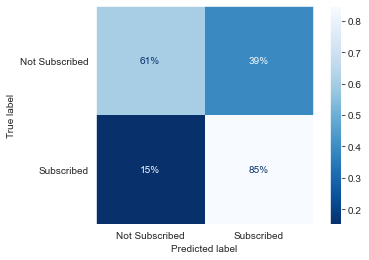

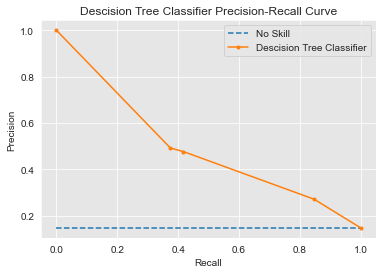

Area Under PR Curve(AP): 0.34
------------------------------------


In [162]:
# Model Evaluation on cross-validation
model_evaluation(dt_gs.best_estimator_, X_train, y_train, X_test, y_test, 'Descision Tree Classifier')

In this model we markedly improved  our recall  but we fall with an accuracy almost by 20% compared to the Logistic Regression model.

##### Model-5. Random Forest Classifier / balanced class_weight/ Pipeline/ Grid Search

In [163]:
scaler = StandardScaler()
# Instantiating Random Forest Clf model
rf_clf = RandomForestClassifier(random_state=27)

rf_pipe = Pipeline(steps=[('prep', preprocessor), 
                            ('rf',rf_clf),
                              ])

# Setting hyperparameters for Grid Search
rf_params = {
    'rf__criterion':['gini','entropy'],
     'rf__class_weight':['balanced'],
     'rf__max_depth': [2,4,6],
     'rf__max_features': ['auto', 'sqrt'],
     'rf__min_samples_leaf': [1, 2, 4],
     'rf__min_samples_split': [2,4, 8],
     }

rf_gs = perform_gridsearch(rf_pipe, rf_params)
# Fitting the Random Forest Clf model
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'has_credit',
                                                                          'balance',
                                                                          'has_housing_loan',
                                                                          'has_personal_loan',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign',
                                                                 

In [164]:
print(f'Training Score:',rf_gs.score(X_train, y_train))
print(f'Testing Score',rf_gs.score(X_test, y_test))

Training Score: 0.8461111111111111
Testing Score 0.8138006571741512


In [165]:
rf_gs.best_params_

{'rf__class_weight': 'balanced',
 'rf__criterion': 'entropy',
 'rf__max_depth': 6,
 'rf__max_features': 'auto',
 'rf__min_samples_leaf': 2,
 'rf__min_samples_split': 8}

------------------------------------
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     21124
           1       0.44      0.85      0.58      3600

    accuracy                           0.82     24724
   macro avg       0.71      0.83      0.73     24724
weighted avg       0.89      0.82      0.84     24724

------------------------------------
Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      5268
           1       0.43      0.81      0.56       913

    accuracy                           0.81      6181
   macro avg       0.69      0.81      0.72      6181
weighted avg       0.88      0.81      0.83      6181

Testing Recall Score of Random Forest Classifier : 81.38%
------------------------------------
Confusion Matrix for Random Forest Classifier


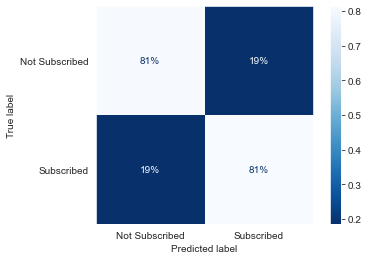

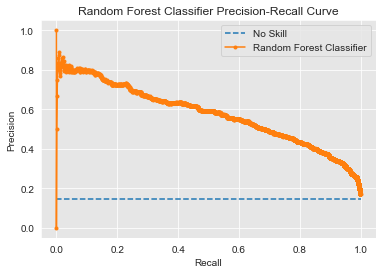

Area Under PR Curve(AP): 0.58
------------------------------------


In [166]:
# Evaluating the Model performance on cross-validation
model_evaluation(rf_gs.best_estimator_, X_train, y_train, X_test, y_test, 'Random Forest Classifier')

The Random Fores Classifier did good job both in training and testing accuracy without .In addition we got pretty well score on recall.

##### Model-6. K-Nearest Neighbors  Classifier / SMOTENC/ Pipeline

In [167]:
# Instantiating   and fitting kNN Model
# I have setup n_jobs=-1 to use all cpus in my env
scaler = StandardScaler()
knn_clf = KNeighborsClassifier(leaf_size=20, n_neighbors= 10,
                               p=1,weights='distance', n_jobs=-1)

knn_pipe = Pipeline(steps=[('prep', preprocessor), 
                            ('knn',knn_clf),
                              ])
knn_pipe.fit(X_train_res, y_train_res)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'has_credit',
                                                   'balance',
                                                   'has_housing_loan',
                                                   'has_personal_loan', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month',
                                      

In [168]:
print(f'Training Score:',knn_pipe.score(X_train_res, y_train_res))
print(f'Testing Score',knn_pipe.score(X_test, y_test))

Training Score: 1.0
Testing Score 0.8440381815240252


------------------------------------
Classification Report for Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21124
           1       1.00      1.00      1.00      3600

    accuracy                           1.00     24724
   macro avg       1.00      1.00      1.00     24724
weighted avg       1.00      1.00      1.00     24724

------------------------------------
Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      5268
           1       0.48      0.61      0.54       913

    accuracy                           0.84      6181
   macro avg       0.70      0.75      0.72      6181
weighted avg       0.86      0.84      0.85      6181

Testing Recall Score of K-Nearest Neighbors : 61.12%
------------------------------------
Confusion Matrix for K-Nearest Neighbors


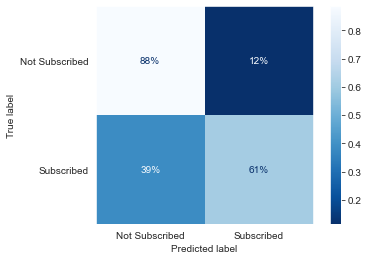

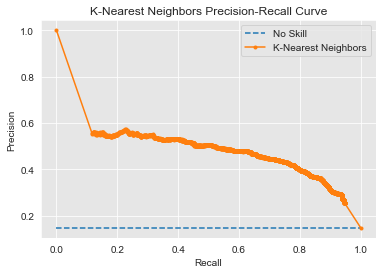

Area Under PR Curve(AP): 0.47
------------------------------------


In [169]:
# Model evaluation 
model_evaluation(knn_pipe, X_train, y_train, X_test, y_test,'K-Nearest Neighbors')

The  K-Nearest Neighbours model along with an oversamplinf method  payed too much attention to every little detail and made a very complex decision boundary which lead to overfitting. This model did well in predicting not subscribed customers.

Another technique that can be used to improve our classification performance is boosting. While data sampling was
designed with the class imbalance problem in mind, boosting is a technique that can improve the performance of any
weak classifier (whether or not the data is imbalanced).
Further I will try to apply the most common boosting algorithms such: <p>
* Gradient Boosting Classifier
* Extreme Gradient Boosting (XGBoost) Classifier
* RUSBoost Classifier
* Light Gradient Boosted Machine (LGBM) Classifier



##### Model-7. Gradient Boosting Classifier / SMOTENC / Pipeline

In [173]:
scaler = StandardScaler()

# Instantiating the GBosting model
gbt_clf = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, 
                                     min_samples_leaf = 3, n_estimators = 200, 
                                     subsample = 0.6, random_state=27)

In [174]:
gbt_pipe = Pipeline(steps=[('prep', preprocessor), 
                          ('gbt', gbt_clf)])
# Fitting and Evaluating GBoosting Model
gbt_pipe.fit(X_train_res,y_train_res)
print(f'Training Score:',gbt_pipe.score(X_train_res, y_train_res))
print(f'Testing Score',gbt_pipe.score(X_test, y_test))

Training Score: 0.9232153001325506
Testing Score 0.8631289435366446


------------------------------------
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     21124
           1       0.60      0.83      0.70      3600

    accuracy                           0.89     24724
   macro avg       0.78      0.87      0.82     24724
weighted avg       0.91      0.89      0.90     24724

------------------------------------
Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      5268
           1       0.53      0.73      0.61       913

    accuracy                           0.86      6181
   macro avg       0.74      0.81      0.76      6181
weighted avg       0.89      0.86      0.87      6181

Testing Recall Score of Gradient Boosting : 73.06%
------------------------------------
Confusion Matrix for Gradient Boosting


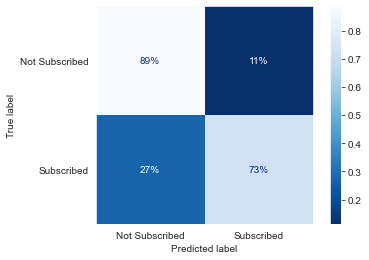

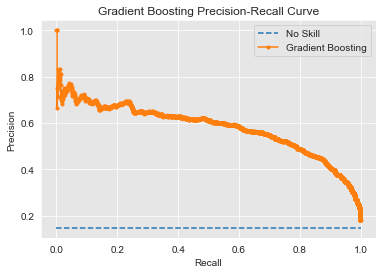

Area Under PR Curve(AP): 0.58
------------------------------------


In [175]:
model_evaluation(gbt_pipe, X_train, y_train, X_test, y_test,'Gradient Boosting')

Gradient Boosting Classifier is somewhat overfitted but not much as k-NN. This model considerably decreased false positive, meaning the client does NOT SUBSCRIBE to a term deposit, but the model thinks he did. <p> Next, I will use a specific implementation of the Gradient Boosting method which uses more accurate approximations to find the best tree model called Extreme Gradient Boosting. 

##### Model-8.  XGBoost Classifier / SMOTENC / Pipeline

In [176]:
scaler = StandardScaler()
# Instantiating the XGBoost Model
xgb_clf = XGBClassifier(learning_rate=0.4, max_depth = 10, min_child_weight = 1, 
                        n_estimators = 200, scale_pos_weight = 2, subsample = .5,
                        random_state=23)
    
                        
xgb_pipe = Pipeline(steps=[('prep', preprocessor), 
                            ('xgb',xgb_clf),
                              ])
xgb_pipe.fit(X_train_res, y_train_res)   

print(f'Training Score:',xgb_pipe.score(X_train_res, y_train_res))
print(f'Testing Score',xgb_pipe.score(X_test, y_test))

[22:40:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score: 1.0
Testing Score 0.8634525157741466


------------------------------------
Classification Report for Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21124
           1       1.00      1.00      1.00      3600

    accuracy                           1.00     24724
   macro avg       1.00      1.00      1.00     24724
weighted avg       1.00      1.00      1.00     24724

------------------------------------
Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5268
           1       0.53      0.66      0.59       913

    accuracy                           0.86      6181
   macro avg       0.73      0.78      0.75      6181
weighted avg       0.88      0.86      0.87      6181

Testing Recall Score of XGBoost Classifier : 65.61%
------------------------------------
Confusion Matrix for XGBoost Classifier


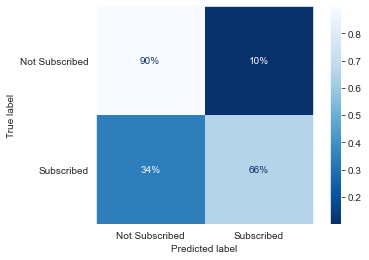

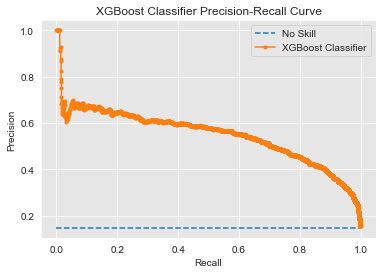

Area Under PR Curve(AP): 0.55
------------------------------------


In [177]:
# Fitting and Evaluating the XGBoost model
#print(f'Training Score:',gbt_pipe.score(X_train_res, y_train_res))
#print(f'Testing Score',gbt_pipe.score(X_test, y_test))

model_evaluation(xgb_pipe,X_train, y_train, X_test, y_test, 'XGBoost Classifier')

XGBoost model along with oversampling techniquealso did overfit. Recall notably dropped  compare to Gradient Boosting  <p>
Next, I will build a so-called novel hybrid data sampling/boosting algorithm called RUSBoost, which is designed to improve the performance of models trained on skewed data. RUSBoost applies random undersampling (RUS), a technique which randomly removes examples from the majority class

##### Model-9.  RUSBoost Classifier / Pipeline /Grid Search

In [178]:

rusboost_clf = RUSBoostClassifier(
        n_estimators=20,
        learning_rate=1.0,
        sampling_strategy='auto',
        random_state=27,
    )
rusboost_pipe = Pipeline(steps=[('prep', preprocessor), 
                            ('rusbst',rusboost_clf),
                              ])
# set up the hyperparameter space
# the default implementation as 2 hyperparameters to optimize
rusboost_params = {
    'rusbst__n_estimators':[10,50,100,150],
    'rusbst__learning_rate':[0.0001, 0.1,0.5,1],
}

rusbst_gs = perform_gridsearch(rusboost_pipe, rusboost_params)

In [179]:
rusbst_gs.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'has_credit',
                                                                          'balance',
                                                                          'has_housing_loan',
                                                                          'has_personal_loan',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign',
                                                                 

In [180]:
print(f'Training Score:',rusbst_gs.score(X_train, y_train))
print(f'Testing Score',rusbst_gs.score(X_test, y_test))

Training Score: 0.8452777777777778
Testing Score 0.8269441401971522


In [181]:
rusbst_gs.best_params_

{'rusbst__learning_rate': 0.1, 'rusbst__n_estimators': 10}

------------------------------------
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.96      0.62      0.75     21124
           1       0.27      0.85      0.41      3600

    accuracy                           0.65     24724
   macro avg       0.62      0.73      0.58     24724
weighted avg       0.86      0.65      0.70     24724

------------------------------------
Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75      5268
           1       0.27      0.83      0.41       913

    accuracy                           0.65      6181
   macro avg       0.61      0.72      0.58      6181
weighted avg       0.85      0.65      0.70      6181

Testing Recall Score of RUSBoost Classifier : 82.69%
------------------------------------
Confusion Matrix for RUSBoost Classifier


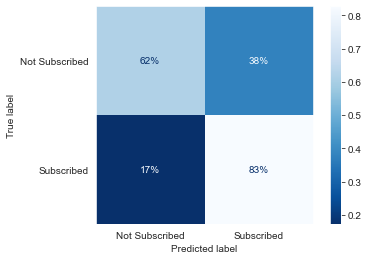

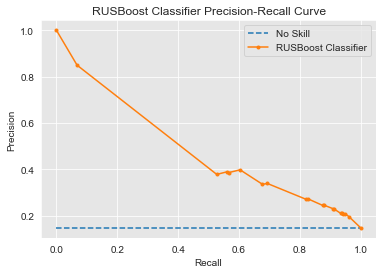

Area Under PR Curve(AP): 0.36
------------------------------------


In [182]:
model_evaluation(rusbst_gs.best_estimator_, X_train, y_train, X_test, y_test, 'RUSBoost Classifier')

We got a recall score of 83% which is better compared to previously built boosting algorithms.

##### Model-9. LGBM Classifier / SMOTENC/ Grid Search

LightGBM extends the gradient boosting algorithm by adding a type of automatic feature selection as well as focusing on boosting examples with larger gradients. This can result in a dramatic speedup of training and improved predictive performance.

In [183]:
scaler = StandardScaler()
# Instantiating the LGBMClassifier
lgbm_clf = LGBMClassifier(max_depth=4,
                          boosting_type='goss',
                          n_estimators=145)

lgbm_pipe = Pipeline(steps=[('prep', preprocessor), 
                          ('lgbm', lgbm_clf)])

Training Score: 0.9022675629615603
Testing Score 0.8569810710241061
------------------------------------
Classification Report for Training:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     21124
           1       0.53      0.80      0.64      3600

    accuracy                           0.87     24724
   macro avg       0.75      0.84      0.78     24724
weighted avg       0.90      0.87      0.88     24724

------------------------------------
Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      5268
           1       0.51      0.76      0.61       913

    accuracy                           0.86      6181
   macro avg       0.73      0.82      0.76      6181
weighted avg       0.89      0.86      0.87      6181

Testing Recall Score of LightGBM : 76.01%
------------------------------------
Confusion Matrix for LightGBM


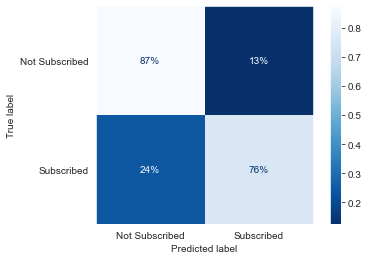

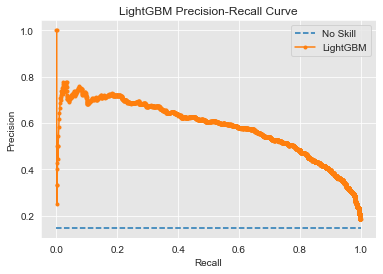

Area Under PR Curve(AP): 0.58
------------------------------------


In [184]:
# Fitting the model
lgbm_pipe.fit(X_train_res, y_train_res)

print(f'Training Score:',lgbm_pipe.score(X_train_res, y_train_res))
print(f'Testing Score',lgbm_pipe.score(X_test, y_test))
# Model Evaluation on cross validation
model_evaluation(lgbm_pipe, X_train, y_train,X_test, y_test, 'LightGBM')

Light Gradient Boosted Machine Classifier gave us better accuracy score with a slighly overfitting. Hovewer, id did not increase a recall.

### 5. Conclusion 

Among all models that I build, Logistic Regression and Random Forest algorithms performed well. An oversampling technique such as SMOTENC did not much help on models' performance. As a final and best  model I chose Random Forest with the recall score 81% and an accuracy score around 82%. Mainly model does a good job of decreasing false-positive which leads to avoiding losing future customers but identifying them as SUBSCRIBED. 

In [236]:
for feat, importance in zip(df.columns, rf_gs.best_estimator_.named_steps['rf'].feature_importances_):
    print ('feature: {f}, importance: {i:.2f}'.format(f=feat, i=importance))
    

feature: age, importance: 0.04
feature: job, importance: 0.00
feature: marital, importance: 0.02
feature: education, importance: 0.06
feature: has_credit, importance: 0.01
feature: balance, importance: 0.01
feature: has_housing_loan, importance: 0.45
feature: has_personal_loan, importance: 0.02
feature: contact, importance: 0.05
feature: day, importance: 0.03
feature: month, importance: 0.00
feature: duration, importance: 0.01
feature: campaign, importance: 0.00
feature: pdays, importance: 0.00
feature: previous, importance: 0.00
feature: prev_camp_outc, importance: 0.00
feature: target, importance: 0.00


#### Recommendation Based On Model Performance

- House Loans and Balances: Potential clients in the average and high balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of subscribing to a term deposit 
- Education : Based on the researchs made by scientists have been proved that an education has large effects on financial market participation and smaller, but statistically and economically signifcant effects on financial management. Education improves credit scores, and dramatically reduces the probability of declaring bankruptcy or suffering foreclosure during the financial crisis. Similarly, it can bring them to make more educated guesses and smart decisions while making a deposit. We highly suggest to take into the account those customers with secondary and tertiary education.
- Effective contact and communication: As a financial service provider , trust comes above everything else as far as  customers are concerned and effective communication is the key to winning that trust. This  enables to show customers that you care, showcase an expertise and values, and more. With proper communication, an organization can create strong connections with customers and eradicate any concerns they may have.  I would suggest to come up with a communication strategy  that mixes different channels of communication and enable the customer to choose the appropriate one for their unique needs.

#### Future Considertion


This modelling is based on behaviour of clients and not on their motivations. The features reveal the actions of client but not his/her thought process. So more descriptive features can be useful here for example interview summary. In that case natural language processing will give better results. In these times of crisis preserving the relationship with best customers is more crucial than ever. Using these results bank can specifically target clients and gain higher success in their endeavours. Saving a lot of time by not focusing on clients with less probability is yet another advantages of this project.